In [ ]:
# Prdicting Term Deposit Subscription in Bnak Mrketing

In [46]:
import numpy as np
import pandas as pd

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
file_path = '/content/drive/MyDrive/bank-full.csv'

df = pd.read_csv(file_path,  sep=";")

print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [49]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [50]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [52]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [53]:
df.shape

(45211, 17)

In [54]:
# Visualization

/tmp/ipython-input-1419722855.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data = df , order = ['no', 'yes'] , palette = 'coolwarm')


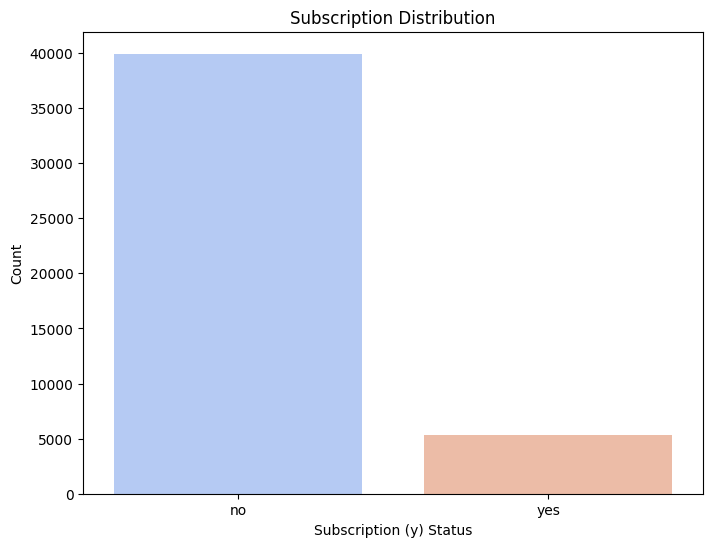

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target varibale (y) distribution , that mean subscription distibution

plt.figure(figsize=(8,6))

sns.countplot(x='y', data = df , order = ['no', 'yes'] , palette = 'coolwarm')
plt.title('Subscription Distribution')
plt.xlabel('Subscription (y) Status')
plt.ylabel('Count')
plt.show()

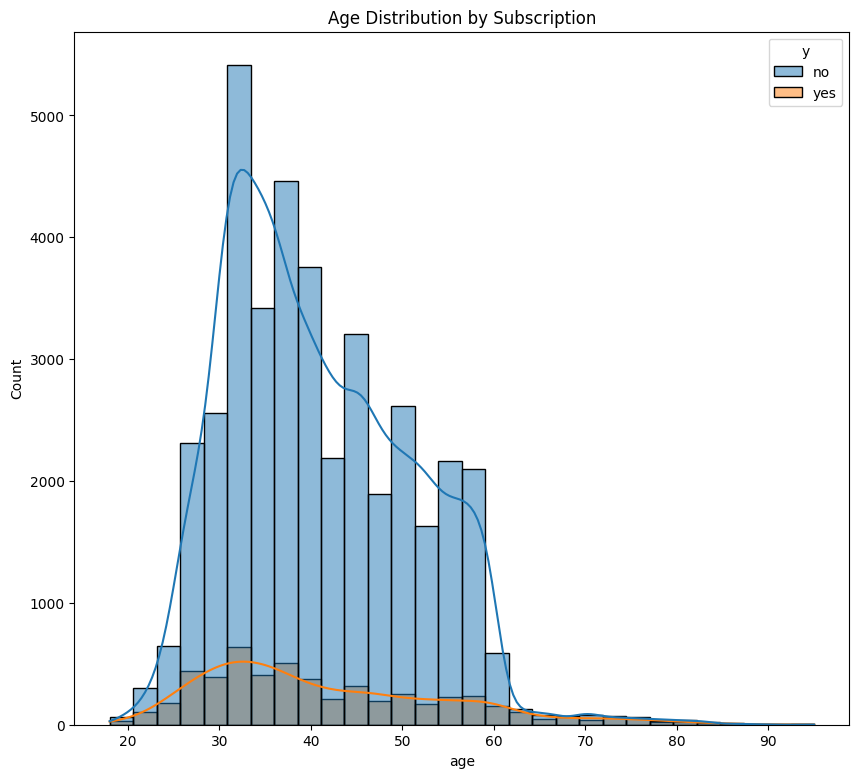

In [56]:
# use histplot to show the Age distribution by subscription

plt.figure(figsize = (10,9))

sns.histplot(data = df, x="age" , hue ='y', kde= True, bins = 30 )
plt.title("Age Distribution by Subscription")
plt.show()

Text(0.5, 1.0, 'Correlation Anlysis')

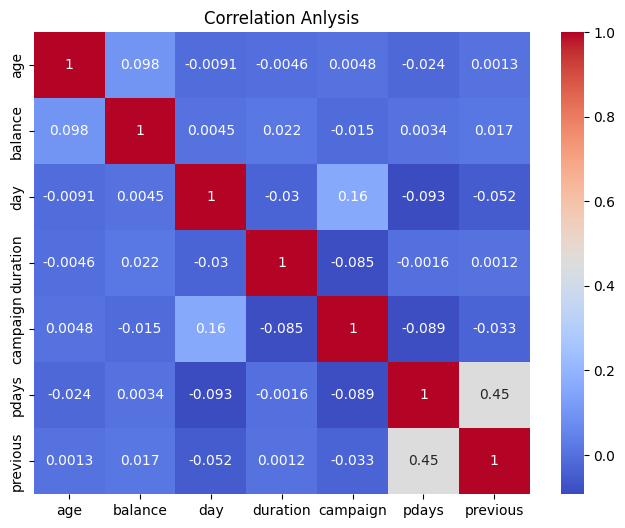

In [57]:

#  correlational analysis on the dataset

plt.figure(figsize=(8,6))

sns.heatmap(df.corr(numeric_only=True), annot = True, cmap = 'coolwarm')
plt.title("Correlation Anlysis")

In [58]:
# pre-processing

df = df.drop_duplicates()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [59]:
# Numeric columns
num_col = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Categorical columns
cat_col = ['job', 'marital', 'education', 'default', 'housing', 'loan',
           'contact', 'month', 'poutcome','y']

print("Numeric columns:", num_col)
print("Categorical columns:", cat_col)


Numeric columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


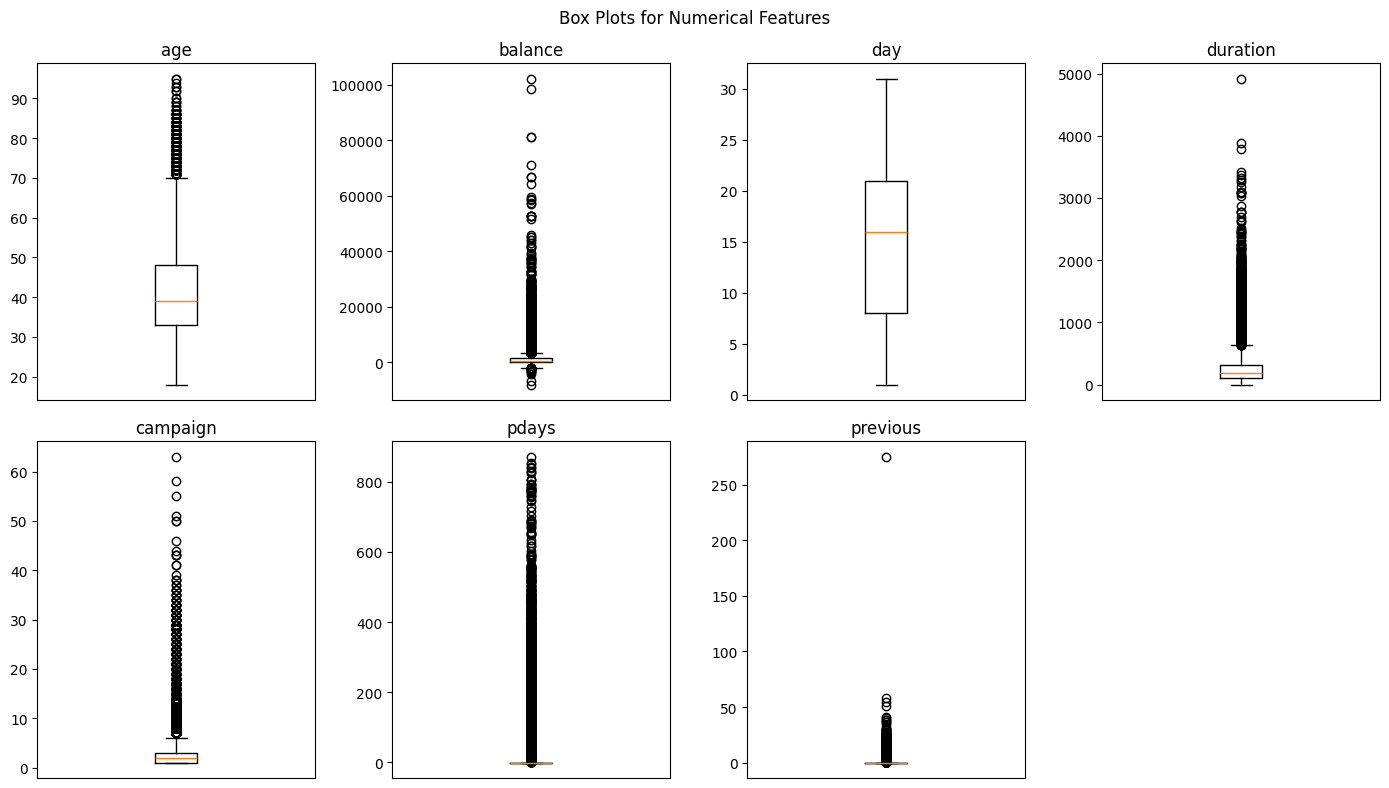

In [60]:
# visulaize the outliers using box-plot


plt.figure(figsize=(14, 8))

for i, col in enumerate(num_col, 1):
    plt.subplot(2, 4, i)   # 2 rows, 4 columns
    plt.boxplot(df[col])
    plt.title(col)
    plt.xticks([])

plt.suptitle('Box Plots for Numerical Features')
plt.tight_layout()
plt.show()

In [61]:
# identify outliers using the IQR Statistical method

for col in num_col:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3-Q1

  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  print(f"{col}: lower ={lower}, upper={upper}")

age: lower =10.5, upper=70.5
balance: lower =-1962.0, upper=3462.0
day: lower =-11.5, upper=40.5
duration: lower =-221.0, upper=643.0
campaign: lower =-2.0, upper=6.0
pdays: lower =-1.0, upper=-1.0
previous: lower =0.0, upper=0.0


In [62]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [63]:
df[num_col].skew()

,0
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


In [66]:
# Fix skew

import numpy as np

skew_cols = ['balance', 'duration', 'campaign', 'previous']

for col in skew_cols:
    df[col] = np.log1p(df[col])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [67]:
# verfi skewness after verifying transform using log1p

df[skew_cols].skew()

,0
balance,-2.176098
duration,-1.272494
campaign,0.770963
previous,2.027333


In [68]:
# Feature Engineering (Creating Better Features)

In [69]:
# convert the target (yes/no) into binary format  1: yes , 0 :no

df['y'] = df['y'].map({'yes':1 , 'no':0})

In [70]:
df['y']

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [71]:
# Binary encoding for the Yes/no columns

binary_cols = ['default', 'housing', 'loan']

# convert yes/no to 0 and 1 binary format

for col in binary_cols:
    df[col] = df[col].map({'yes':1, 'no':0})

In [72]:
print(binary_cols)
print(df[col])

['default', 'housing', 'loan']
0        0
1        0
2        1
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: loan, Length: 45211, dtype: int64


In [73]:
# Age grouping is feature engineering  becasue there are diffrent age people , now we are grouping then into 4 groups

df['age_group'] = pd.cut(df['age'],bins = [18,30,45,60,100], labels = ['Young', 'Adult','Senior', 'Elder'])


In [74]:
df['age_group']

,age_group
0,Senior
1,Adult
2,Adult
3,Senior
4,Adult
...,...
45206,Senior
45207,Elder
45208,Elder
45209,Senior


In [75]:
# Campaign intensity
# number of contacts made during the : current campaign

# previous : number of contacts made before this campaign

df['campaign_intensity'] = df['campaign'] / (df['previous'] + 1)

df['campaign_intensity']

,campaign_intensity
0,0.526589
1,0.526589
2,0.526589
3,0.526589
4,0.526589
...,...
45206,0.869742
45207,0.741276
45208,0.549098
45209,0.959135


In [76]:
# Ordinal Encoding for the columns eductaion

education_map = {
    'unknown':0,
    'primary':1,
    'secondary': 2,
    'tertiary': 3

}

df['education'] = df['education'].map(education_map)

In [77]:
df['education']

,education
0,3
1,2
2,2
3,0
4,0
...,...
45206,3
45207,1
45208,2
45209,2


In [78]:
from sklearn.preprocessing import StandardScaler
import numpy as np # Import numpy for nan


# Replace inf with NaN and then fill NaN values
df[num_col] = df[num_col].replace([np.inf, -np.inf], np.nan)
df[num_col] = df[num_col].fillna(df[num_col].median()) # Using median for imputation

scaler = StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])

In [79]:
df['y']

,y
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [80]:
# apply one hot encoder for the belwo cat_col_ohe becasue these cat cols contains labels numeric we are converting those into binary using one hot encoding

cat_col_ohe = ['job', 'marital', 'contact', 'poutcome', 'month', 'age_group']

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop = 'first', sparse_output =False)

encoded = ohe.fit_transform(df[cat_col_ohe])


In [81]:
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cat_col_ohe))


In [82]:
df_final = pd.concat([df.drop(cat_col_ohe, axis=1), encoded_df], axis=1)


In [83]:
X = df_final.drop('y', axis=1)
y = df_final['y'].map({'yes':1, 'no':0})

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [84]:
# Assuming X and df_final are already defined from previous cells

# Correctly assign y from df_final['y'], which should contain 0s and 1s
y = df_final['y']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [85]:
y_pred_log = log_model.predict(X_test)

In [86]:
y_pred_log

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Logistic Regression Results")
print("--------------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Results
--------------------------------
Accuracy: 0.899922592060157

Confusion Matrix:
 [[7760  192]
 [ 713  378]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.66      0.35      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043

